# 9. Unsupervised Learning

Unsupervised Learning Techniques

Contents
1. Clustering 236
* K-Means 238
* Limits of K-Means 248
* Using Clustering for Image Segmentation 249
* Using Clustering for Preprocessing 251
* Using Clustering for Semi-Supervised Learning 253
* DBSCAN 255
* Other Clustering Algorithms 258
2. Gaussian Mixtures 260
* Anomaly Detection Using Gaussian Mixtures 266
* Selecting the Number of Clusters 267
* Bayesian Gaussian Mixture Models 270
* Other Algorithms for Anomaly and Novelty Detection 274




1. Clustering
    * Group similar instances together into cluster.
        * ex: data analysis, customer segmentation, recommender system, search engine, image segmentation, semi-supervised learning, dimensionality reduction
2. Anomaly detection
    * To learn what "normal" data looks like, and then use that to detect abnormal instances.
        * ex: defective items on the production line, new trend in a time-series
3. Density estimation
    * Estimating the probability density function (PDF) - commonly used for anomaly detection


236-275 - 오늘 끝내기

# Clustering: 
identifying similar instances and assigning them to clusters, or groups of ismilar instances

### Clustering is used in:
1. Customer segmentation
    - useful in recommender system to suggest content that other users in the same cluster enjoyed
2. Data analysis
3. Diemnsionality reduction
    - Each instance's feature vector x can then be replaced with the bector of its cluster affinities. If there are k clusters, then this vector is k-dimensional
4. Anomaly detection
    - Any instance that has a low affinity to all the clusters is likely to be an anomaly. Anomaly detection is useful in manufacturing or fraud detection.
5. Semi-supervised learning
    - If you only have a few labels, perform clustering and propagate the labels to all the instances in the same cluster.
6. Search engines
    - Finding images that are similar to a reference image --> apply a clustering algorithm to all the images in your database, similar images would end up in the same cluster.
7. To segment an image
    - Can reduce the number of different colors in the image.
    - Image segmentation is used in many objevt detection and tracking systems.
    - Makes it easier to detect the contour of each object
    

### Data preparation for clustering algorithms

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [3]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [4]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

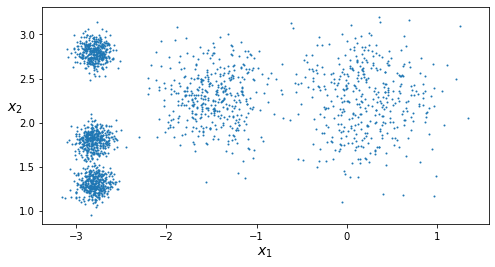

In [6]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

## K-Means

1. Place the centroids randomly
2. Label the instances
3. Update the centroids

... continue till the centroids stop moving.

The algorithm is guaranteed to converge, but it may not converge to the right solution depending on the intialization of the centroid.

In [7]:
from sklearn.cluster import KMeans

In [8]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [9]:
kmeans.labels_ is y_pred

True

In [10]:
kmeans.cluster_centers_.round(1)

array([[ 0.2,  2.3],
       [-2.8,  1.8],
       [-1.5,  2.3],
       [-2.8,  2.8],
       [-2.8,  1.3]])

In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

In [12]:
# hard clustering = assigning each instance to a single cluster
# soft clustering = give each instance a score per cluster

In [13]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [14]:
# If you already know where would be good centroids, you can specify them as initialization points.
# You can run the algorithms multiple times and keep the best solution only
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=5)
# n_init = n --> run the algorithm n time, and select the best model.
# it tracks model's inertia == Mean Squared distance between each instance and its closest centroid.

In [15]:
kmeans.fit(X)
kmeans.inertia_

/Users/soomin/.pyenv/versions/miniforge3-4.10.1-5/envs/handson-conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params(X)


211.59853725816836

In [16]:
kmeans.score(X)

-211.59853725816836

K-Means++
- Smarter initialization step that tends to select centroids that are distant from one another.
- Makes the K-Means algorithm much less likely to converge to a suboptimal solution


# This is already implemented in KMeans cluster (init=‘k-means++’) default
1. Take one centroid, chosen uniformly at random from the dataset
2. Take the new centroid from the probability distribution where (Distance of the point i from the closest centroid / Distances of all the points from the closest centroid)
3. Repeat step 2 until all k centroids have been chosen

In [17]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

# How to select K

In [20]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

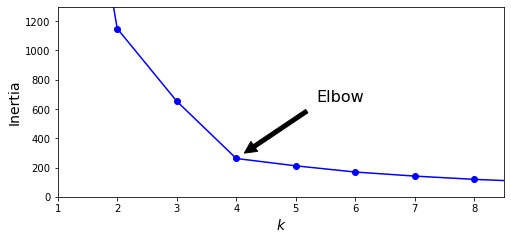

In [22]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [24]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [25]:
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.6068660656395705,
 0.5600381725018386,
 0.5668839323465226]

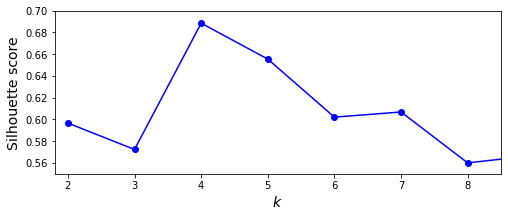

In [31]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

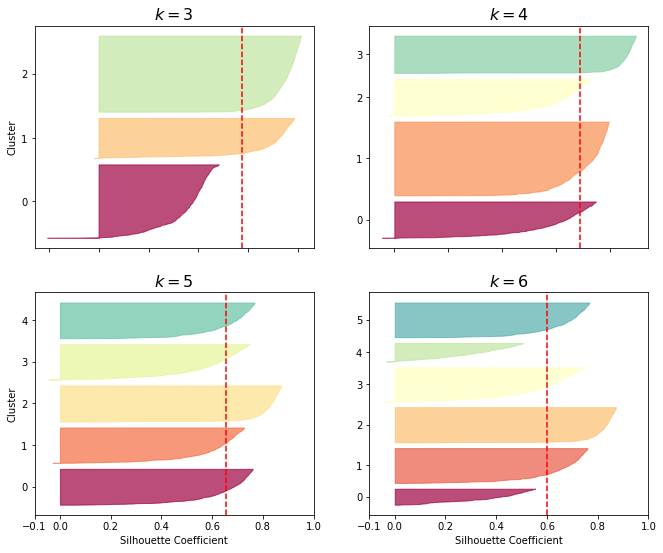

In [35]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### Limits of K-Means
Merits:
1. Fast
2. Scalable

Limits:
1. it is necessary to run the algorithm several times to avoid suboptimal solutions
2. need to specify the number of clusters
3. Does not behave very well when clusters have:
    1. varying sizes
    2. different densities
    3. nonspherical shapes
    
            For the elliptical clusters, Gaussian mixture models work better

Important:

It is important to scale the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly. It uses Euclidean distance, so it is better to scale it otherwise one feature with big scale will drive the clusters.

### Using Clustering for Image Segmentation

In [39]:
# Download the ladybug image
import urllib.request
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x139db1ae0>)

In [41]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [42]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [48]:
X.shape

(426400, 3)

In [51]:
kmeans.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [50]:
kmeans.cluster_centers_

array([[0.8791308 , 0.71994007, 0.03617528],
       [0.02278969, 0.11061361, 0.00578035],
       [0.98317736, 0.93372846, 0.02561254],
       [0.09970969, 0.25384477, 0.01689582],
       [0.6115668 , 0.6302521 , 0.38852066],
       [0.372135  , 0.52292645, 0.15698028],
       [0.2186847 , 0.38638583, 0.05776607],
       [0.7649688 , 0.20048073, 0.04376465]], dtype=float32)